ARTI308 - Machine Learning
# Seaborn Overview

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [1]:
import seaborn as sns 
%matplotlib inline    

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

C:\Users\AftabKhan\AppData\Local\Temp\ipykernel_3240\1093071496.py:1: UserWarning: 
,
,`distplot` is a deprecated function and will be removed in seaborn v0.14.0.
,
,Please adapt your code to use either `displot` (a figure-level function with
,similar flexibility) or `histplot` (an axes-level function for histograms).
,
,For a guide to updating your code to use the new functions, please see
,https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
,
,  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

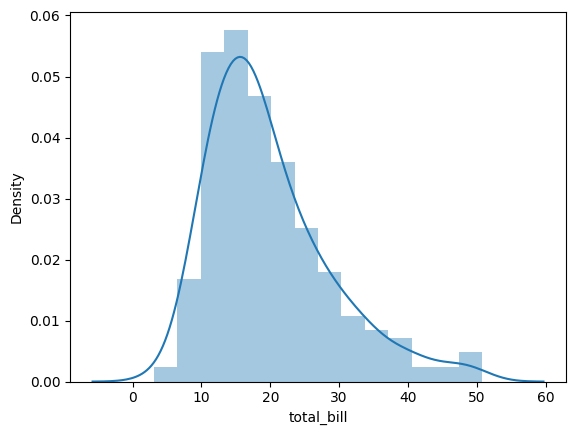

In [4]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

C:\Users\AftabKhan\AppData\Local\Temp\ipykernel_3240\1274391954.py:1: UserWarning: 
,
,`distplot` is a deprecated function and will be removed in seaborn v0.14.0.
,
,Please adapt your code to use either `displot` (a figure-level function with
,similar flexibility) or `histplot` (an axes-level function for histograms).
,
,For a guide to updating your code to use the new functions, please see
,https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
,
,  sns.distplot(tips['total_bill'],kde=False,bins=30)


<Axes: xlabel='total_bill'>

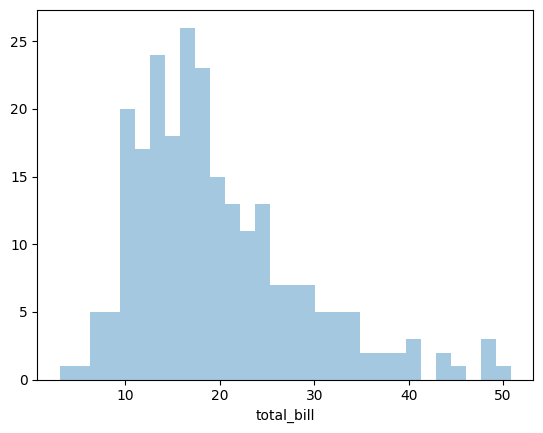

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

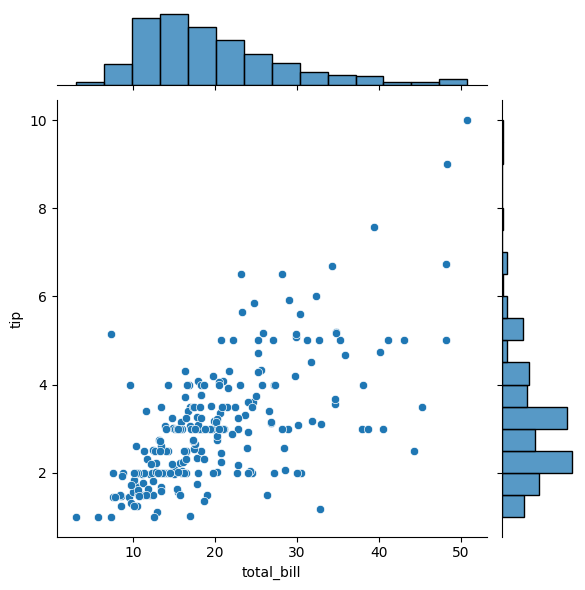

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

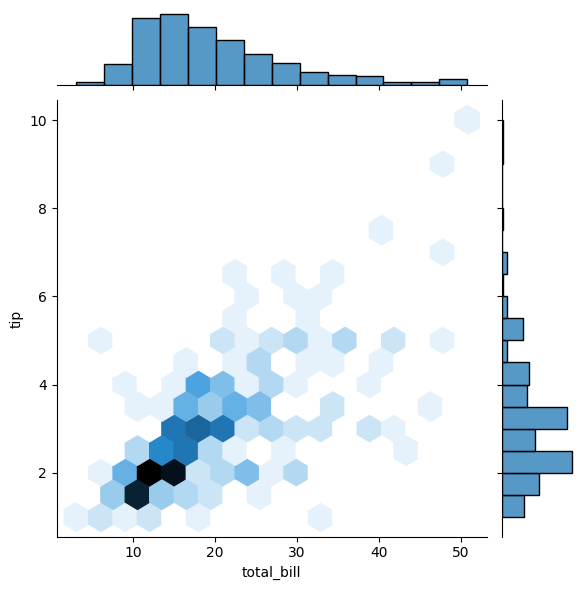

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

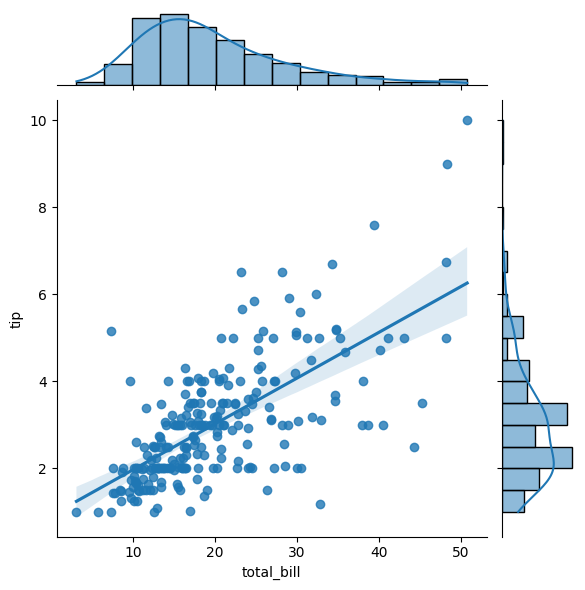

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

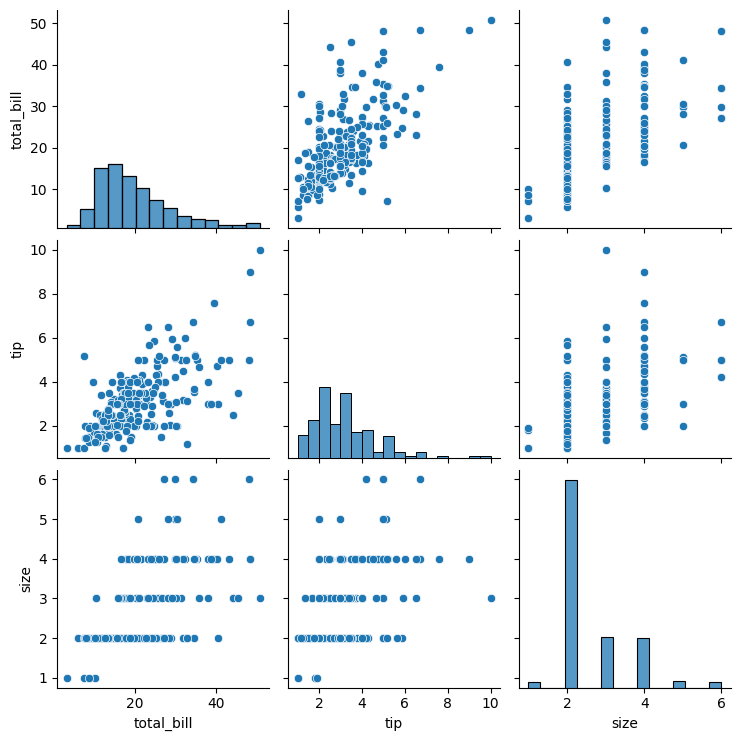

In [9]:
sns.pairplot(tips)

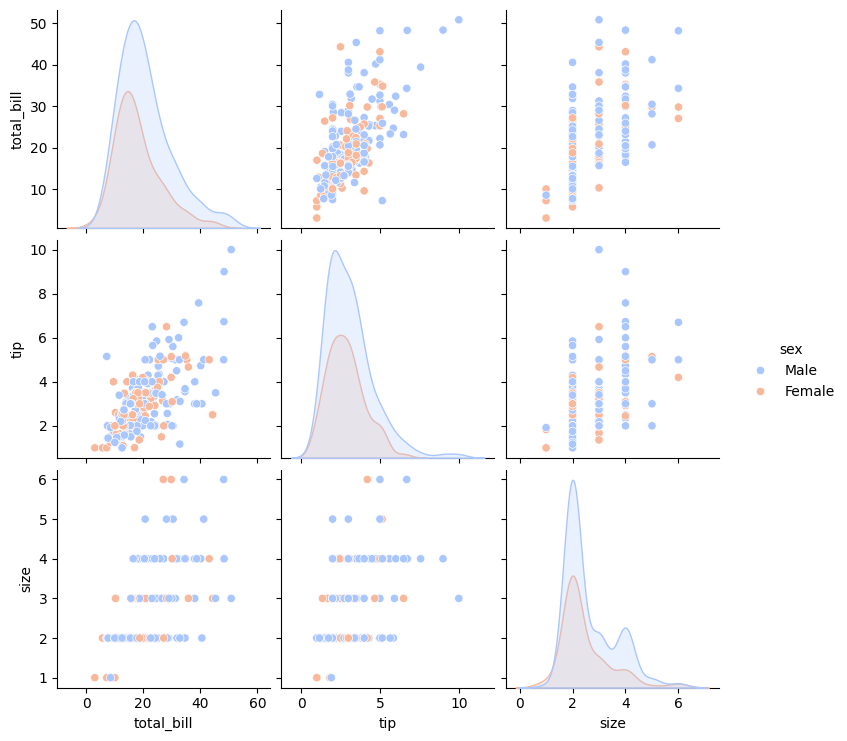

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

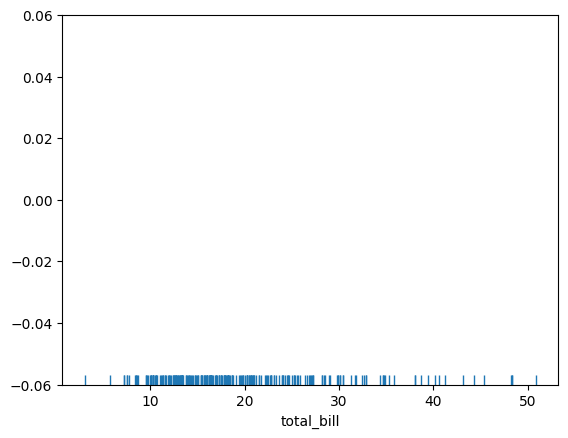

In [11]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

In [12]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

In [ ]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

In [ ]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [ ]:
import seaborn as sns  # Import Seaborn library for statistical data visualization
%matplotlib inline  # Display plots directly inside the Jupyter Notebook output

In [ ]:
tips = sns.load_dataset('tips')  # Load the built-in "tips" dataset from Seaborn
tips.head()  # Display the first 5 rows of the dataset

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

In [ ]:
sns.barplot(x='sex', y='total_bill', data=tips)  
# Create a bar plot showing the average total_bill for each sex (default estimator = mean)

In [ ]:
import numpy as np  
# Import NumPy library for numerical functions

You can change the estimator object to your own function, that converts a vector to a scalar:

In [ ]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)  
# Create a bar plot showing the standard deviation of total_bill for each sex instead of the mean

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

In [ ]:
sns.countplot(x='sex', data=tips)  
# Create a count plot showing the number of records for each sex category

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')  
# Create a boxplot of total_bill grouped by day with rainbow color palette

In [ ]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")  
# Create a boxplot of total_bill by day, split by smoker status using color grouping

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')  
# Create a violin plot showing the distribution of total_bill for each day

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')  
# Create a violin plot grouped by day and separated by sex using color distinction

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')  
# Create a split violin plot showing male and female distributions on the same shape for each day

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

In [5]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow')  
# Create a strip plot showing individual total_bill points for each day

<class 'NameError'>: name 'sns' is not defined

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, palette='rainbow')  
# Add horizontal jitter to spread points and reduce overlap

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')  
# Color the points by sex while keeping jitter enabled

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1', dodge=True)  
# Separate (dodge) male and female points side-by-side within each day category

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=tips)  
# Create a swarm plot that automatically arranges points to avoid overlap

### Combining Categorical Plots

In [7]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

<class 'NameError'>: name 'sns' is not defined

## catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

In [4]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar')

<class 'NameError'>: name 'sns' is not defined

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [ ]:
import seaborn as sns# Import Seaborn library for statistical data visualization
%matplotlib inline# Display plots directly inside the Jupyter Notebook

In [ ]:
flights = sns.load_dataset('flights')# Load the built-in "flights" dataset

In [ ]:
tips = sns.load_dataset('tips')# Load the built-in "tips" dataset

In [ ]:
tips.head()# Display the first 5 rows of the tips dataset

In [ ]:
flights.head()# Display the first 5 rows of the flights dataset

## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [ ]:
tips.head()# Display the first 5 rows of the tips dataset

In [ ]:
# Matrix form for correlation data
tips.corr()# Compute the correlation matrix between numerical columns in tips dataset

In [ ]:
sns.heatmap(tips.corr())# Visualize the correlation matrix as a heatmap

In [ ]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)# Display the heatmap with a coolwarm color map and show correlation values inside cells

Or for the flights data:

In [ ]:
flights.pivot_table(values='passengers',index='month',columns='year')# Reshape flights data into a matrix: rows=month, columns=year, values=passengers

In [ ]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')# Store the pivot table in a variable for visualization
sns.heatmap(pvflights)# Create a heatmap of passenger counts by month and year

In [ ]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)# Create heatmap with magma color map and white grid lines between cells

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

In [ ]:
sns.clustermap(pvflights)# Create a clustered heatmap that groups similar rows and columns using hierarchical clustering

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

In [ ]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,standard_scale=1)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [ ]:
import seaborn as sns# Import Seaborn library for statistical data visualization
%matplotlib inline# Display plots directly inside the Jupyter Notebook

In [ ]:
tips = sns.load_dataset('tips')# Load the built-in "tips" dataset

In [ ]:
tips.head()# Display the first 5 rows of the tips dataset

## lmplot()

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips)

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

In [ ]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,height=8)

### Reference:

* https://seaborn.pydata.org/ - Seaborn: statistical data visualization


* https://seaborn.pydata.org/tutorial/color_palettes.html - Color palettes